**1. Dataset Preparation**

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

**Download MNIST dataset dan Extract gzip file**


In [4]:
import torchvision.datasets as datasets

mnist = datasets.MNIST(root='./data', train=True, download=True)


**Load image dataset**

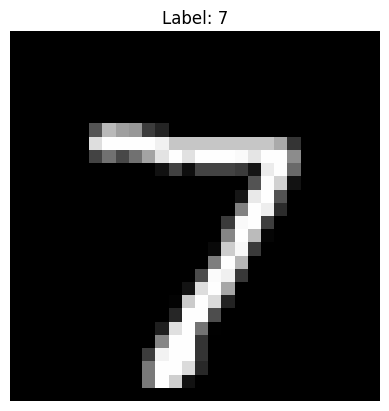

In [9]:
mnist_test = datasets.MNIST(root='./data', train=False, download=True)
images, labels = mnist_test.data, mnist_test.targets

plt.imshow(images[0], cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.axis('off')
plt.show()


In [10]:
label_second = mnist.targets[1]
print(label_second)

tensor(0)


**Test extract HOG feature from image**

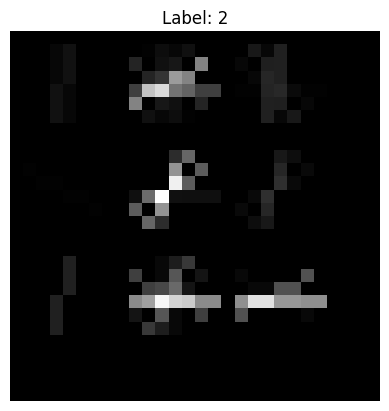

In [12]:
feature, hog_img = hog(images[1].numpy(), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
plt.imshow(hog_img, cmap='gray')
plt.title(f'Label: {labels[1]}')
plt.axis('off')
plt.show()

In [13]:
feature.shape

(144,)

<BarContainer object of 144 artists>

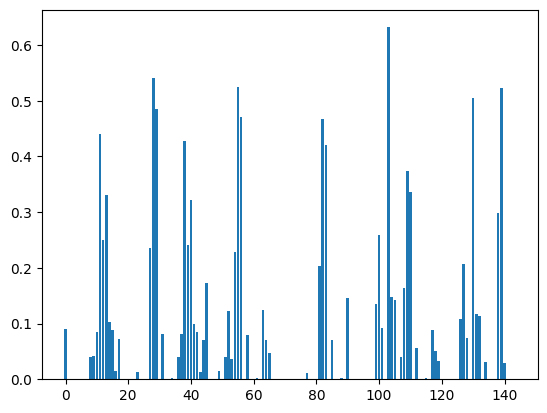

In [14]:
plt.bar(list(range(feature.shape[0])), feature)

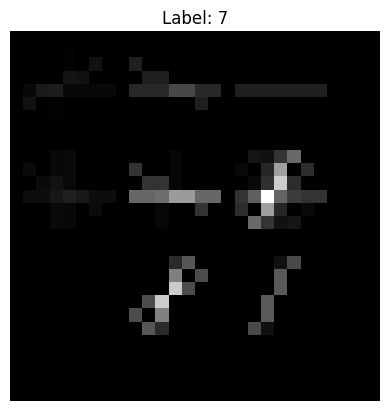

In [15]:
feature, hog_img = hog(images[0].numpy(), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
plt.imshow(hog_img, cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.axis('off')
plt.show()

<BarContainer object of 144 artists>

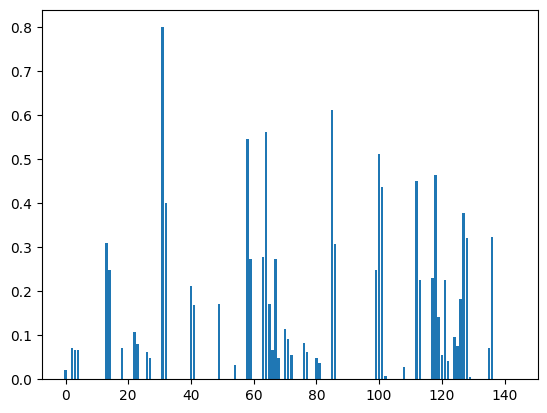

In [16]:
plt.bar(list(range(feature.shape[0])), feature)

**2. Preprocessing using HOG Feature Extraction**




In [17]:
n_dims = feature.shape[0]

In [18]:
n_dims

144

In [19]:
n_samples = images.shape[0]

In [20]:
n_samples

10000

**Create variable for dataset**

In [25]:
from sklearn.datasets import make_classification
n_features = 144
X_train, y_train = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=3, random_state=50)

In [26]:
X_train.shape

(10000, 144)

**Get HOG feature from each image & put into dataset variable**

In [27]:
for i in range(n_samples):
    features, _ = hog(images[i].numpy().reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    X_train[i] = features
    y_train[i] = labels[i].item()

**Convert categorical label to one hot label**

In [28]:
from sklearn.preprocessing import LabelBinarizer

In [29]:
lb = LabelBinarizer()

In [30]:
lb.fit(y_train)

LabelBinarizer()

In [31]:
y_train_one_hot = lb.transform(y_train)

In [32]:
y_train_one_hot

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
y_train_one_hot.shape

(10000, 10)

In [34]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
y_train[0]

7

In [36]:
import numpy as np

In [37]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [38]:
label[0]

7

**3. Classification with Neural Networks**

In [39]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [40]:
clf.fit(X_train, y_train_one_hot)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

**4. Predict Test Dataset**

In [44]:
n_samples_test = test_images.shape[0]

In [45]:
X_test, y_test = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, random_state=42)

In [48]:
for i in range(n_samples):
    features, _ = hog(test_images[i].numpy().reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    X_test[i] = features
    y_test[i] = test_labels[i].item()

In [49]:
y_test_one_hot = lb.transform(y_test)

In [50]:
y_pred_one_hot = clf.predict(X_test)

In [51]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [52]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

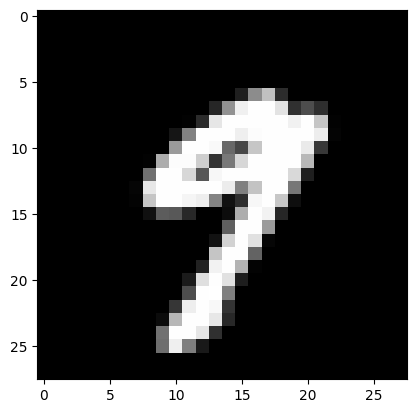

In [53]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [54]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [55]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [56]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [57]:
out[0]

0

**5. Evaluation Metrics**

**5. 1 Confussion Matrix**

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)

In [60]:
conf_mat

array([[ 961,    0,    1,    1,   10,    0,    7,    0,    0,    0],
       [  34, 1073,    4,    0,   23,    0,    1,    0,    0,    0],
       [ 126,    0,  873,   24,    2,    0,    0,    6,    1,    0],
       [ 241,    0,   35,  723,    0,    7,    0,    3,    0,    1],
       [ 271,   16,    0,    0,  670,    0,    1,   18,    0,    6],
       [  91,    0,    0,   42,    0,  744,   15,    0,    0,    0],
       [  87,    3,    0,    0,    0,    9,  859,    0,    0,    0],
       [ 157,    1,   32,    0,   39,    0,    0,  797,    0,    2],
       [ 778,    0,    5,    0,   17,   14,    0,    1,  104,   55],
       [ 383,    0,    0,    0,   26,    5,    0,   45,  172,  378]])

In [61]:
from mlxtend.plotting import plot_confusion_matrix

In [62]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

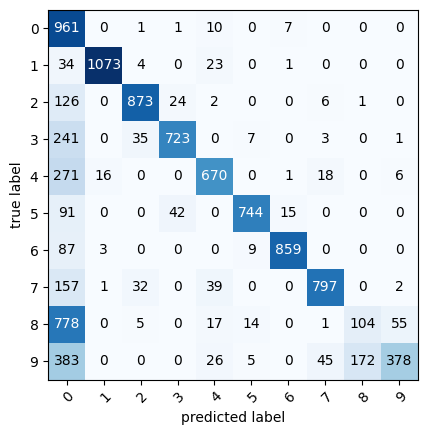

In [63]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

**5.2 Precission**

In [64]:
from sklearn.metrics import precision_score

In [65]:
precision = precision_score(y_test, y_pred, average=None)

In [66]:
precision

array([0.30712688, 0.98170174, 0.91894737, 0.91518987, 0.85133418,
       0.9550706 , 0.97281993, 0.91609195, 0.37545126, 0.85520362])

**5.3 Recall**

In [67]:
from sklearn.metrics import recall_score

In [68]:
recall = recall_score(y_test, y_pred, average=None)

In [69]:
recall

array([0.98061224, 0.94537445, 0.84593023, 0.71584158, 0.68228106,
       0.83408072, 0.89665971, 0.77529183, 0.10677618, 0.37462834])

**5.4 Accuracy**

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy = accuracy_score(y_test, y_pred)

In [72]:
accuracy

0.7182

**5.5 F1-Score**

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1 = f1_score(y_test, y_pred, average='macro')

In [75]:
f1

0.722349279680222